# Mounting the drive for reading files

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth, drive
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Importing the relevant libraries

In [ ]:

import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Dense, Activation, Dropout 
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 



# Loading the data

In [ ]:
#Exogenously setting the feature names to avoid confusion
feature_names = ["fixed acidity","volatile acidity", "cirtic acid","residual sugar","chlorides","free sulphur dioxide", "total sulphur dioxide","density","pH","sulphates","alcohol","quality"]
#Reading the red wine data
red_wine_data = pd.read_csv('/content/drive/My Drive/winequality-red (1).csv',names  =feature_names, sep = ';', header =1)
white_wine_data = pd.read_csv('/content/drive/My Drive/winequality-white (1).csv',names  =feature_names, sep = ';', header =1)
print(red_wine_data.head())
print(white_wine_data.head())
#Joining both the data sets into one 
wine_data = red_wine_data.append(white_wine_data)
wine_features = wine_data[feature_names].drop('quality',axis =1).values
#Isolating the wine quality labels
wine_quality = wine_data['quality'].values
print(wine_quality)


   fixed acidity  volatile acidity  cirtic acid  ...  sulphates  alcohol  quality
0            7.8              0.88         0.00  ...       0.68      9.8        5
1            7.8              0.76         0.04  ...       0.65      9.8        5
2           11.2              0.28         0.56  ...       0.58      9.8        6
3            7.4              0.70         0.00  ...       0.56      9.4        5
4            7.4              0.66         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
   fixed acidity  volatile acidity  cirtic acid  ...  sulphates  alcohol  quality
0            6.3              0.30         0.34  ...       0.49      9.5        6
1            8.1              0.28         0.40  ...       0.44     10.1        6
2            7.2              0.23         0.32  ...       0.40      9.9        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            8.1              0.28         0.40  ...       0.44     10.1   

# Analysing the data set

<bound method NDFrame.describe of       fixed acidity  volatile acidity  cirtic acid  ...  sulphates  alcohol  quality
0               7.8              0.88         0.00  ...       0.68      9.8        5
1               7.8              0.76         0.04  ...       0.65      9.8        5
2              11.2              0.28         0.56  ...       0.58      9.8        6
3               7.4              0.70         0.00  ...       0.56      9.4        5
4               7.4              0.66         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
4892            6.2              0.21         0.29  ...       0.50     11.2        6
4893            6.6              0.32         0.36  ...       0.46      9.6        5
4894            6.5              0.24         0.19  ...       0.46      9.4        6
4895            5.5              0.29         0.30  ...       0.38     12.8        7
4896            6.0            

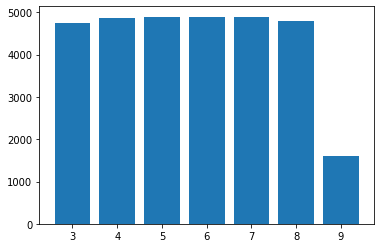

In [ ]:
#Visualising which values occur the most
plt.bar(wine_quality, wine_data.index.values)
#Getting summary statistics 
print(wine_data.describe)
print(np.min(wine_quality))
print(np.max(wine_quality))

# Standardizing the data

In [ ]:
scaler = StandardScaler().fit(wine_features)
wine_features = scaler.transform(wine_features)
print(wine_features)


[[ 0.45096432  3.28325769 -2.19361441 ... -0.11503088  0.99939622
  -0.58046553]
 [ 0.45096432  2.55415626 -1.91827331 ...  0.25825195  0.79780158
  -0.58046553]
 [ 3.07335116 -0.36224947  1.66116109 ... -0.3638861   0.3274141
  -0.58046553]
 ...
 [-0.551713   -0.60528328 -0.88574415 ... -1.42152079 -0.47896443
  -0.91588354]
 [-1.32300324 -0.30149102 -0.12855611 ...  0.75596239 -1.01655012
   1.93516956]
 [-0.93735812 -0.78755864  0.42212611 ...  0.25825195 -1.41973939
   1.09662453]]


# Splitting the data set into training and testing sets

In [38]:
X_train, X_test,y_train, y_test = train_test_split(wine_data, wine_quality)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4871, 12)
(4871,)
(1624, 12)
(1624,)


# Training the model

In [59]:
#Defining the model
model = Sequential()
#Input Layer
model.add(Dense(1024,input_dim =12, activation = 'relu'))
#Hidden Layers
model.add(Dropout(0.3, noise_shape=None, seed = None))
model.add(Dense(16, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1))
#Goal is to lower validation mse loss
model.compile(loss = 'mse', optimizer ='adamax', metrics = ['mse'])
#Fitting the model 
fitted_model = model.fit(X_train,y_train, epochs=23, validation_data= (X_test,y_test), batch_size =16)

Epoch 1/23
305/305 [==============================] - 1s 2ms/step - loss: 2.5527 - mse: 2.5527 - val_loss: 0.6434 - val_mse: 0.6434
Epoch 2/23
305/305 [==============================] - 1s 2ms/step - loss: 0.8883 - mse: 0.8883 - val_loss: 0.3413 - val_mse: 0.3413
Epoch 3/23
305/305 [==============================] - 1s 2ms/step - loss: 0.6561 - mse: 0.6561 - val_loss: 0.4995 - val_mse: 0.4995
Epoch 4/23
305/305 [==============================] - 1s 2ms/step - loss: 0.5058 - mse: 0.5058 - val_loss: 0.2220 - val_mse: 0.2220
Epoch 5/23
305/305 [==============================] - 1s 2ms/step - loss: 0.3959 - mse: 0.3959 - val_loss: 0.2509 - val_mse: 0.2509
Epoch 6/23
305/305 [==============================] - 1s 2ms/step - loss: 0.3208 - mse: 0.3208 - val_loss: 0.2189 - val_mse: 0.2189
Epoch 7/23
305/305 [==============================] - 1s 2ms/step - loss: 0.2503 - mse: 0.2503 - val_loss: 0.1078 - val_mse: 0.1078
Epoch 8/23
305/305 [==============================] - 1s 2ms/step - loss: 0.

Displaying the mean squared error  

In [64]:
from math import sqrt
print("The Validation Root mean squared error is:", sqrt(np.mean(fitted_model.history["val_mse"])))


The Validation Root mean squared error is: 0.3384959986207983
3
9
